In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
#import handcalcs.render
sp.init_printing() # sympy expression printing
import plotly.graph_objects as go
import plotly.express as px
from scipy import optimize
from IPython.display import display, Math, Markdown
import numpy.polynomial.polynomial as poly

In [14]:
display(Markdown('# Polynomier'))
display(Markdown('## Repræsentation og rødder'))
display(Markdown('Man kan bruge modulet Numpy til at regne med polynomier'))

p = poly.Polynomial([-16, 24, -9, 1])

display(Markdown('Polynomial:'))
print(p)    

# Polynomier

## Repræsentation og rødder

Man kan bruge modulet Numpy til at regne med polynomier

Polynomial:

poly([-16.  24.  -9.   1.])


In [8]:
display(Markdown(f'rødder: {p.roots()}'))
display(Markdown('Bemærk, at rødderne kan være komplekse'))

rødder: [1.+0.00000000e+00j 4.-4.99800141e-08j 4.+4.99800141e-08j]

Bemærk, at rødderne kan være komplekse

In [15]:

display(Markdown('## Calculus'))

dp = p.deriv()

display(Markdown('Det afledede polynomial:'))
print(dp)
display(Markdown('og integralet:'))

P = dp.integ()

print(P)

display(Markdown('Bemærk at integrationskonstanten som default sættes til 0, men det kan specificeres som argument til polyint'))

P = dp.integ(m=1, k=p.coef[0])

print(P)

## Calculus

Det afledede polynomial:

poly([ 24. -18.   3.])


og integralet:

poly([ 0. 24. -9.  1.])


Bemærk at integrationskonstanten som default sættes til 0, men det kan specificeres som argument til polyint

poly([-16.  24.  -9.   1.])


In [19]:
x, y = p.linspace(100, domain=[-1, 3])

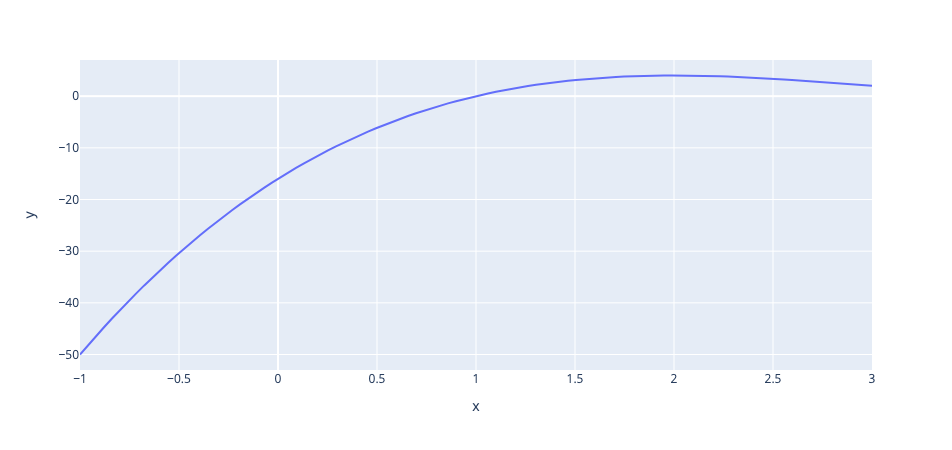

In [20]:
fig = px.line(x=x, y=y)
fig.show()

In [ ]:
P = np.polyint(dp)
print(P)

In [ ]:
x = np.linspace(-1, 6 ,100)

In [ ]:
#%timeit p(x)

In [ ]:
#%timeit np.polyval(p,x)

In [ ]:
p(4)

In [ ]:
x = sp.symbols('x')
sp.Poly(p.coef, x).as_expr()

In [ ]:
z = np.full(100,1)
t = np.full(100,5)

In [ ]:
fig = px.line(x=x, y=[p(x),z,t])
fig.show()

In [ ]:
x = symbols('x')
k = symbols('k')

In [ ]:
expr = x**3 - 9*x**2 + 24*x - 15

In [ ]:
type(expr)

In [ ]:
pprint(expr)

In [ ]:
pprint(expr.diff())

In [ ]:
sol = solveset(expr.diff(), x)
sol

In [ ]:
G=list(sol)[0]

In [ ]:
solve(G, k)

In [ ]:
list(sol)[0].subs(k, 15).evalf()

In [ ]:
N(_)

In [ ]:
solveset(expr.diff())

In [ ]:
N(_)

In [ ]:

# Global optimization
grid = (1, 3, 0.01)
xmin_global = optimize.brute(p, (grid, ))
print("Global minima found %s" % xmin_global)

xmin_local = optimize.fminbound(p, -1, 4)
print("Local minimum found %s" % xmin_local)

In [ ]:
def f(x):
    return 3*x**4 -140*x**3

In [ ]:
def df(x):
    return 12*x**3 - 420*x**2

In [ ]:
x = np.linspace(-10, 40 ,200)

In [ ]:
fig = px.line(x=x, y=[f(x), df(x)])
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.add_trace(go.Scatter(x=x, y=df(x)))
fig.show()

In [ ]:
x = Symbol('x')

In [ ]:
polynomial = 3*x**4-140*x**3

In [ ]:
polynomial.expand()

In [ ]:
polynomial.factor()

In [ ]:
equation = Eq(polynomial, 0)
equation

In [ ]:
roots(Eq(polynomial.diff(),0))

In [ ]:
f = Function('f')
a = Symbol('a')
ics = {f(0): 2, f(x).diff(x).subs(x, 0): -1}
dsolve(f(x).diff(x) - 3 + 2*f(x), f(x), ics=ics)

In [ ]:
ics = {f(0): 1.8}
dsolve(f(x).diff(x) + 0.03 * f(x), f(x), ics=ics)

In [ ]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-15, 50), y_lim=(-20, 50), ax=None):
    f_np = lambdify((x, y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)

    if ax is None:
        _, ax = plt.subplots(figsize=(10, 10))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)

    ax.axis('tight') 
    ax.set_title(r"$%s$" %
                 (latex(Eq(f(x).diff(x), f_xy))),
                 fontsize=18)
    return ax

In [ ]:
x = symbols("x")
f = Function("f")
plot_direction_field(x, f(x), -0.03* f(x))

In [ ]:
A = np.array([[-2, 1], [3/4, 1]])
B = np.array([-5, 1/2])
X = np.linalg.inv(A).dot(B)

print(X)